# IRIS CLASSIFICATION MODEL

In this notebook, we will build a classification model to predict the species of Iris flowers using the famous Iris dataset. We'll go through the steps of loading the data, performing exploratory data analysis (EDA), feature engineering, building the classification model, and evaluating its performance.

# Local Image


Here is an image uploaded to the notebook:



![IRIS](irisimg.png)

# Basic ideology on IrisClassification

# Problem Statement:


Create the model that can classify the different species of the Iris flower.

We are going to create a model for classifying the the type of iris based on the variables of the dataset.

In first place, we’re going to identifying the variables

Sepal: The sepal is the part that forms the calyx of a flower, typically function as protection for the flower in bud, and often as support for the petals when in bloom.

We have two variables

1.The Sepal lenght on centimeters 2.The Sepal Width on centimeters

Petal: Petals are modified leaves that surround the reproductive parts of flowers.

We have two variables

The Petal lenght on centimeters The Petal Width on centimeters The Types of Flowers Iris is a genus of 260–300 species of flowering plants with showy flowers. It takes its name from the greek word for a rainbow,Iris.

In the dataset we have three types of iris: 1.Iris Setosa 2.Iris Versicolour 3.Iris Virginica.

The data set consists of:

150 samples 3 labels: species of Iris (Iris setosa, Iris virginica and Iris versicolor). 4 features: Sepal length,Sepal width,Petal length,Petal Width in cm.

# Iris dataset.


Here is an image uploaded to the notebook:

![IRIS](isisimg2.png)

# Goal


The iris species have been classified into three categories that are setosa, versicolor, or virginica.

The goal is to create a machine learning model that can learn from the measurements of these irises whose species are already known so that we can predict the species for the new irises that she has founded or in other words if she will find any new iris flower.

# Importing modules

In [4]:
pip install numpy pandas matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [6]:
import sklearn
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Loding the Dataset

In [9]:
import pandas as pd

iris = pd.read_csv("iris.csv")

iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris = iris.drop(columns = ['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.describe()
#basic stats of data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# display no of samples in each class

iris['Species'].value_counts()



In [13]:
#to check any null values
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# Exploratory Data Analysis (EDA)


<Axes: >

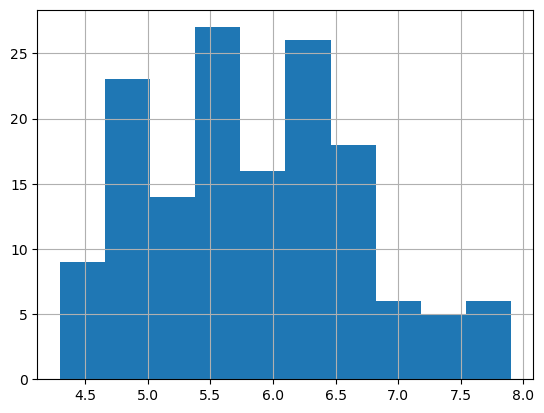

In [14]:
#data analysis
iris['SepalLengthCm'].hist()

<Axes: >

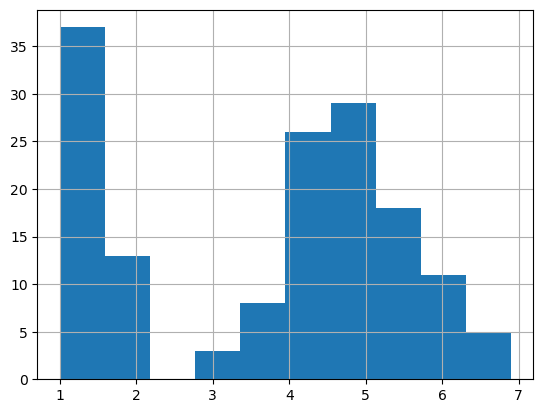

In [15]:
iris['PetalLengthCm'].hist()


<Axes: >

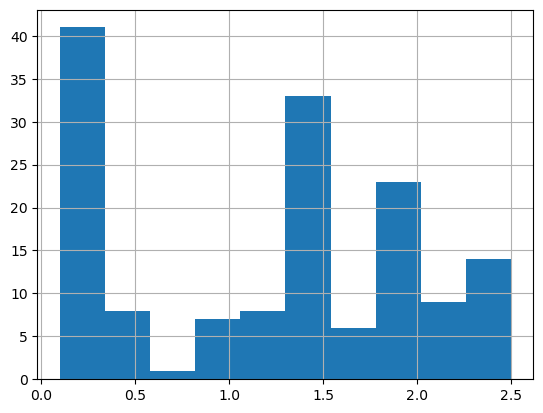

In [16]:
iris['PetalWidthCm'].hist()


<Axes: >

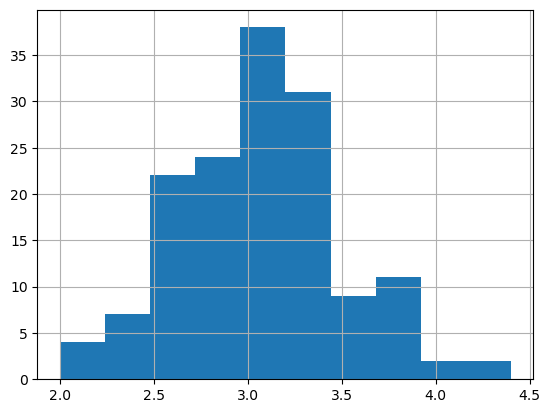

In [17]:
iris['SepalWidthCm'].hist()


In [18]:
# scatter plotting, to create list of colors and lables
colors = ['red','green','blue']
Species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

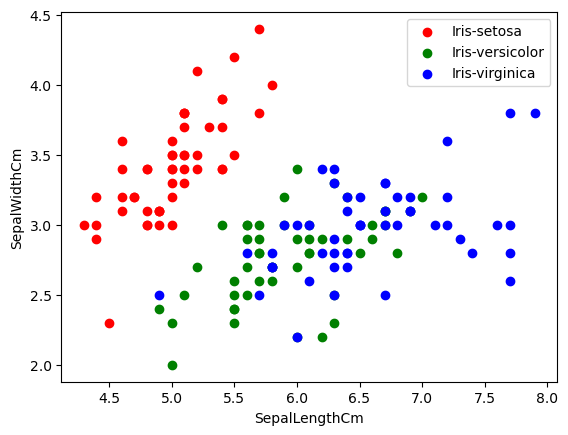

In [19]:
for i in range(3):
  x=iris[iris['Species'] == Species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = colors[i], label=Species[i])
plt.xlabel("SepalLengthCm")
plt.ylabel("SepalWidthCm")
plt.legend()
plt.show()

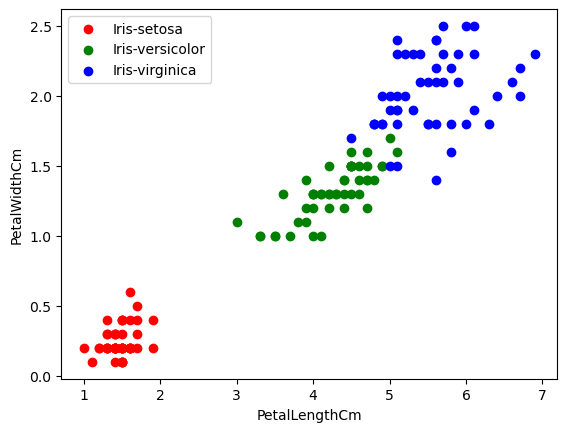

In [20]:
for i in range(3):
  x=iris[iris['Species'] == Species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label=Species[i])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend()
plt.show()

In [21]:
iris.groupby("Species").size()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Correlation Matrix


<Axes: >

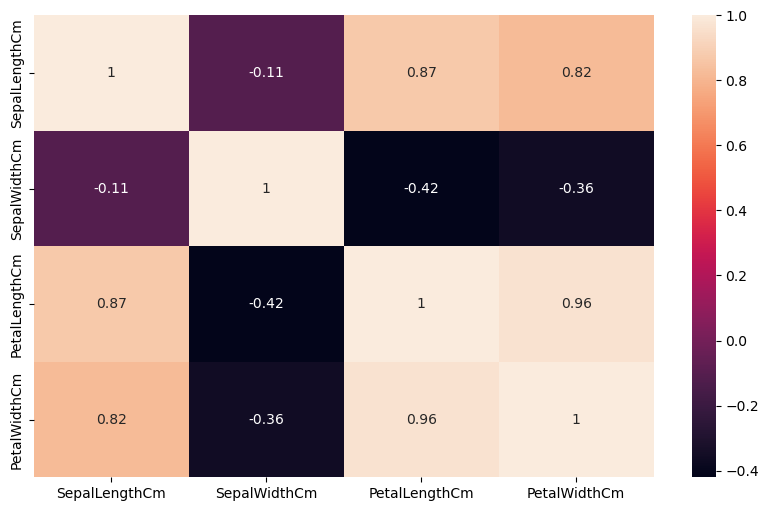

In [22]:
corr = iris.corr(numeric_only = True)
plt.subplots(figsize=(10,6))
sns.heatmap(corr, annot=True)

# Model Training and Testing



In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pickle

#input data
X = iris.drop(columns=['Species'])
#output data
Y = iris['Species']
#split data for train and test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.30)

In [24]:

#logistic regression 
model = LogisticRegression()
model.fit(x_train, y_train)
print("Logistic Regression Accuracy: ", model.score(x_train, y_train)*100) 

Logistic Regression Accuracy:  98.09523809523809


In [25]:
model.fit(x_train.values, y_train.values)


LogisticRegression()

In [26]:
print("Accuracy: ",model.score(x_test, y_test)*100)


Accuracy:  93.33333333333333


In [27]:
#k-nearest neighbours 
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbours Accuracy: ", model.score(x_test,y_test)*100)
                                                

K-nearest neighbours Accuracy:  97.77777777777777


In [28]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [29]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  97.77777777777777


In [30]:
#decision tree
model= DecisionTreeClassifier()
model.fit(x_train.values, y_train.values)
print("Decision Tree Accuracy: ", model.score(x_test,y_test)*100)

Decision Tree Accuracy:  91.11111111111111


In [31]:
model.fit(x_train.values, y_train.values)

DecisionTreeClassifier()

In [32]:
print("Accuracy: ",model.score(x_test, y_test)*100)

Accuracy:  91.11111111111111


In [33]:
import pickle
filename= 'saved_model.sav'
pickle.dump(model,open(filename,'wb'))

In [34]:
import pickle



In [35]:
#saving the updated model
filename= 'saved_model.sav'
try:
    with open(filename,'wb')as file:
        pickle.dump(model,file)
    print("Model saved successfully.")
except Exception as e:
    print(f"Error saving the model:{e}")

Model saved successfully.


In [36]:
load_model= pickle.load(open(filename,'rb'))

In [37]:
load_model.predict([[6,5,2,1]])


array(['Iris-versicolor'], dtype=object)

In [38]:
import sklearn
print(sklearn.__version__)


1.3.0


In [39]:
 x_test.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
45,4.8,3.0,1.4,0.3
26,5.0,3.4,1.6,0.4
124,6.7,3.3,5.7,2.1
5,5.4,3.9,1.7,0.4
116,6.5,3.0,5.5,1.8


In [40]:
load_model.predict([[1,2,3,4]])


array(['Iris-virginica'], dtype=object)

# Conclusion

In this notebook, we successfully built a classification model for predicting the species of Iris flowers. We followed these key steps:

# Data Loading and Preprocessing


We loaded the Iris dataset and performed basic preprocessing, ensuring the data was ready for analysis.